In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("../input/Malware dataset.csv")

In [3]:
data.head()

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,0,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
1,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,1,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
2,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,2,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
3,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,3,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
4,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,4,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0


In [4]:
data.shape

(100000, 35)

In [5]:
data.isnull().sum()

hash                 0
millisecond          0
classification       0
state                0
usage_counter        0
prio                 0
static_prio          0
normal_prio          0
policy               0
vm_pgoff             0
vm_truncate_count    0
task_size            0
cached_hole_size     0
free_area_cache      0
mm_users             0
map_count            0
hiwater_rss          0
total_vm             0
shared_vm            0
exec_vm              0
reserved_vm          0
nr_ptes              0
end_data             0
last_interval        0
nvcsw                0
nivcsw               0
min_flt              0
maj_flt              0
fs_excl_counter      0
lock                 0
utime                0
stime                0
gtime                0
cgtime               0
signal_nvcsw         0
dtype: int64

In [6]:
data.columns

Index([u'hash', u'millisecond', u'classification', u'state', u'usage_counter',
       u'prio', u'static_prio', u'normal_prio', u'policy', u'vm_pgoff',
       u'vm_truncate_count', u'task_size', u'cached_hole_size',
       u'free_area_cache', u'mm_users', u'map_count', u'hiwater_rss',
       u'total_vm', u'shared_vm', u'exec_vm', u'reserved_vm', u'nr_ptes',
       u'end_data', u'last_interval', u'nvcsw', u'nivcsw', u'min_flt',
       u'maj_flt', u'fs_excl_counter', u'lock', u'utime', u'stime', u'gtime',
       u'cgtime', u'signal_nvcsw'],
      dtype='object')

In [7]:
data1=data.dropna(how="any",axis=0)
data1.head()

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,0,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
1,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,1,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
2,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,2,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
3,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,3,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
4,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,4,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0


In [8]:
data1["classification"].value_counts()

malware    50000
benign     50000
Name: classification, dtype: int64

In [9]:
data1['classification'] = data1.classification.map({'benign':0, 'malware':1})

In [10]:
data1.head()

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,0,1,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
1,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,1,1,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
2,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,2,1,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
3,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,3,1,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
4,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,4,1,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0


In [11]:
data1.tail()

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
99995,025c63d266e05d9e3bd57dd9ebd0abe904616f569fe4e2...,995,1,4096,0,3070148608,13988,0,0,0,...,2,1,120,0,3204448256,371979,3,0,0,0
99996,025c63d266e05d9e3bd57dd9ebd0abe904616f569fe4e2...,996,1,4096,0,3070148608,13988,0,0,0,...,2,1,120,0,3204448256,371979,3,0,0,0
99997,025c63d266e05d9e3bd57dd9ebd0abe904616f569fe4e2...,997,1,4096,0,3070148608,13988,0,0,0,...,2,1,120,0,3204448256,371979,3,0,0,0
99998,025c63d266e05d9e3bd57dd9ebd0abe904616f569fe4e2...,998,1,4096,0,3070148608,13988,0,0,0,...,2,1,120,0,3204448256,371979,3,0,0,0
99999,025c63d266e05d9e3bd57dd9ebd0abe904616f569fe4e2...,999,1,4096,0,3070148608,13988,0,0,0,...,2,1,120,0,3204448256,371979,3,0,0,0


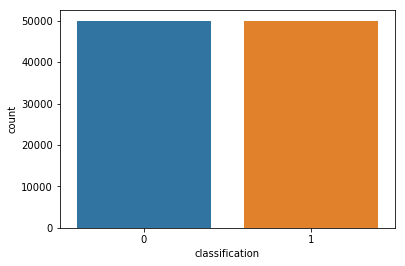

In [12]:
sns.countplot(data1["classification"])
plt.show()

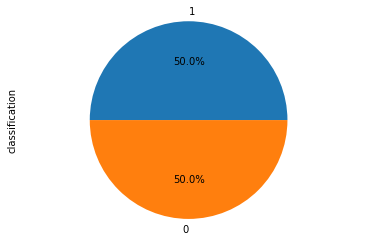

In [13]:
data1["classification"].value_counts().plot(kind="pie",autopct="%1.1f%%")
plt.axis("equal")
plt.show()

In [14]:
benign1=data.loc[data['classification']=='benign']
benign1["classification"].head()

1000    benign
1001    benign
1002    benign
1003    benign
1004    benign
Name: classification, dtype: object

In [15]:
malware1=data.loc[data['classification']=='malware']
malware1["classification"].head()

0    malware
1    malware
2    malware
3    malware
4    malware
Name: classification, dtype: object

In [16]:
corr=data1.corr()
corr.nlargest(35,'classification')["classification"]

classification       1.000000
prio                 0.110036
last_interval        0.006952
min_flt              0.003070
millisecond          0.000000
gtime               -0.014416
stime               -0.042037
free_area_cache     -0.051237
total_vm            -0.059291
state               -0.064702
mm_users            -0.093641
reserved_vm         -0.118608
fs_excl_counter     -0.137883
nivcsw              -0.143791
exec_vm             -0.255123
map_count           -0.271227
static_prio         -0.317941
end_data            -0.324954
maj_flt             -0.324954
shared_vm           -0.324954
vm_truncate_count   -0.354861
utime               -0.369931
nvcsw               -0.386889
Name: classification, dtype: float64

In [17]:
x=data1.drop(["hash","classification",'vm_truncate_count','shared_vm','exec_vm','nvcsw','maj_flt','utime'],axis=1)
x.head()

,millisecond,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,task_size,cached_hole_size,...,end_data,last_interval,nivcsw,min_flt,fs_excl_counter,lock,stime,gtime,cgtime,signal_nvcsw
0,0,0,0,3069378560,14274,0,0,0,0,0,...,120,3473,0,0,0,3204448256,4,0,0,0
1,1,0,0,3069378560,14274,0,0,0,0,0,...,120,3473,0,0,0,3204448256,4,0,0,0
2,2,0,0,3069378560,14274,0,0,0,0,0,...,120,3473,0,0,0,3204448256,4,0,0,0
3,3,0,0,3069378560,14274,0,0,0,0,0,...,120,3473,0,0,0,3204448256,4,0,0,0
4,4,0,0,3069378560,14274,0,0,0,0,0,...,120,3473,0,0,0,3204448256,4,0,0,0


In [18]:
y=data1["classification"]
y

0        1
1        1
2        1
3        1
4        1
5        1
6        1
7        1
8        1
9        1
10       1
11       1
12       1
13       1
14       1
15       1
16       1
17       1
18       1
19       1
20       1
21       1
22       1
23       1
24       1
25       1
26       1
27       1
28       1
29       1
        ..
99970    1
99971    1
99972    1
99973    1
99974    1
99975    1
99976    1
99977    1
99978    1
99979    1
99980    1
99981    1
99982    1
99983    1
99984    1
99985    1
99986    1
99987    1
99988    1
99989    1
99990    1
99991    1
99992    1
99993    1
99994    1
99995    1
99996    1
99997    1
99998    1
99999    1
Name: classification, Length: 100000, dtype: int64

In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [21]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [22]:
pred=model.predict(x_test)
pred

array([1, 1, 1, ..., 1, 0, 1])

In [23]:
model.score(x_test,y_test)

0.6274

In [24]:
result=pd.DataFrame({
    "Actual_Value":y_test,
    "Predict_Value":pred
})

In [25]:
result

,Actual_Value,Predict_Value
43660,0,1
87278,1,1
14317,0,1
81932,1,1
95321,1,1
5405,1,1
33188,0,1
63421,1,1
72897,1,1
9507,0,0


In [37]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
from sklearn.cluster import KMeans

In [38]:
knn = KNeighborsClassifier(n_neighbors=15)
clf = knn.fit(x_train, y_train)
y_pred = clf.predict(x_test)
acc_knb_model=roc_auc_score(y_test, y_pred)*100
acc_knb_model

99.4165379615329

In [39]:
lr = LogisticRegression(C = 0.2)
clf1 = lr.fit(x_train, y_train)
y_pred1 = clf1.predict(x_test)
acc_log_reg=roc_auc_score(y_test, y_pred1)*100
acc_log_reg

/opt/conda/envs/py27/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


60.573717485749846

In [40]:
clf2 = GaussianNB().fit(x_train, y_train)
y_pred2 = clf2.predict(x_test)
acc_nb=roc_auc_score(y_test, y_pred2)*100
acc_nb

62.829431438127095

In [41]:
clf3 = tree.DecisionTreeClassifier().fit(x_train, y_train)
y_pred3 = clf3.predict(x_test)
acc_dt=roc_auc_score(y_test, y_pred3)*100
acc_dt

100.0

In [42]:
clf4 = RandomForestClassifier(max_depth=5, random_state=0).fit(x_train, y_train)
y_pred4 = clf4.predict(x_test)
acc_rmf_model=roc_auc_score(y_test, y_pred4)*100
acc_rmf_model

/opt/conda/envs/py27/lib/python2.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


96.39525994733276

In [43]:
sgd_model=SGDClassifier()
sgd_model.fit(x_train,y_train)
sgd_pred=sgd_model.predict(x_test)
acc_sgd=round(sgd_model.score(x_train,y_train)*100,10)
acc_sgd

/opt/conda/envs/py27/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


50.0714285714

In [46]:
regr = linear_model.LinearRegression()
regr.fit(x_train,y_train)
regr_pred=regr.predict(x_test)
acc_regr=round(regr.score(x_train,y_train)*100,10)
acc_regr

43.9153520167

In [ ]:
clf5 = SVC(gamma='auto').fit(x_train, y_train)
y_pred5 = clf5.predict(x_test)
acc_svm_model=roc_auc_score(y_test, y_pred5)*100
acc_svm_model

In [ ]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest','Stochastic Gradient Decent','Linear Regression','Naive Bayes','XGBoost','LightGBM','Decision Tree'],
    'Score': [acc_svm_model, acc_knb_model, acc_log_reg, 
              acc_rmf_model,acc_sgd,acc_regr,acc_nb,acc_xgb,acc_lgbm,acc_dt]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df